In [1]:
!pip install ts2vg

     |████████████████████████████████| 1.0 MB 5.2 MB/s 


In [2]:
!pip install igraph

     |████████████████████████████████| 3.2 MB 5.2 MB/s 


In [3]:
!pip install pycairo
!pip install cairocffi

     |████████████████████████████████| 344 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
     |████████████████████████████████| 88 kB 2.1 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89667 sha256=c9cef153f3642ba1e67c485a78bcbff8c64b335ef7b8a3fb6826d043f8423993
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


In [4]:
def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving acc_climbingdown_chest_S1.csv to acc_climbingdown_chest_S1.csv
Saving acc_climbingdown_chest_S2.csv to acc_climbingdown_chest_S2.csv
Saving acc_climbingdown_chest_S3.csv to acc_climbingdown_chest_S3.csv
Saving acc_climbingdown_chest_S4.csv to acc_climbingdown_chest_S4.csv
Saving acc_climbingdown_chest_S5.csv to acc_climbingdown_chest_S5.csv
Saving acc_climbingdown_chest_S6.csv to acc_climbingdown_chest_S6.csv
Saving acc_climbingdown_chest_S7.csv to acc_climbingdown_chest_S7.csv
Saving acc_climbingdown_chest_S8.csv to acc_climbingdown_chest_S8.csv
Saving acc_climbingdown_chest_S9.csv to acc_climbingdown_chest_S9.csv
Saving acc_climbingdown_chest_S10.csv to acc_climbingdown_chest_S10.csv
Saving acc_climbingdown_chest_S11.csv to acc_climbingdown_chest_S11.csv
Saving acc_climbingdown_chest_S12.csv to acc_climbingdown_chest_S12.csv
Saving acc_climbingdown_chest_S13.csv to acc_climbingdown_chest_S13.csv
Saving acc_climbingdown_chest_S14.csv to acc_climbingdown_chest_S14.csv
Saving acc

In [7]:
#Task 1 (1.1, 1.2, 1.3)
from ts2vg import HorizontalVG
from ts2vg import NaturalVG
import numpy as np
import pandas as pd

col_names = ['Method', 'Subject', 'Accelerometer axis', 'Average degree', 'Network diameter', 'Average path length', 'Activity']
output_table = pd.DataFrame(columns = col_names)

activity = ['walking', 'running', 'climbingup', 'climbingdown']

for subject_itr in range(1, 16):
  for activity_itr in activity:
    file_read = 'acc_' + activity_itr + '_chest_S' + str(subject_itr) + '.csv'
    file_data = pd.read_csv(file_read)
    for VG_Type in [1,2]:
      for attribute in ['attr_x', 'attr_y', 'attr_z']:
        if VG_Type == 1:
          g = NaturalVG()
          g.build(file_data[attribute][1000:2048])
          ig_ng_d = g.as_igraph()
          temp_tbl = {'Method':'Natural Visibility Graph', 'Subject':subject_itr, 'Accelerometer axis':attribute, 'Average degree':np.mean(ig_ng_d.degree()), 'Network diameter':ig_ng_d.diameter(), 'Average path length':ig_ng_d.average_path_length(), 'Activity':activity_itr}
          output_table = output_table.append(temp_tbl, ignore_index = True)
        else:
          g = HorizontalVG()
          g.build(file_data[attribute][1000:2048])
          ig_hg_d = g.as_igraph()
          temp_tbl = {'Method':'Horizontal Visibility Graph', 'Subject':subject_itr, 'Accelerometer axis':attribute, 'Average degree':np.mean(ig_hg_d.degree()), 'Network diameter':ig_hg_d.diameter(), 'Average path length':ig_hg_d.average_path_length(), 'Activity':activity_itr}
          output_table = output_table.append(temp_tbl, ignore_index = True)

output_table

,Method,Subject,Accelerometer axis,Average degree,Network diameter,Average path length,Activity
0,Natural Visibility Graph,1,attr_x,11.572519,9,4.462960,walking
1,Natural Visibility Graph,1,attr_y,11.971374,9,4.299560,walking
2,Natural Visibility Graph,1,attr_z,8.583969,10,4.895552,walking
3,Horizontal Visibility Graph,1,attr_x,3.961832,27,11.722253,walking
4,Horizontal Visibility Graph,1,attr_y,3.958015,22,10.748937,walking
...,...,...,...,...,...,...,...
355,Natural Visibility Graph,15,attr_y,14.242366,11,5.582451,climbingdown
356,Natural Visibility Graph,15,attr_z,9.055344,9,4.513980,climbingdown
357,Horizontal Visibility Graph,15,attr_x,3.963740,28,12.843555,climbingdown
358,Horizontal Visibility Graph,15,attr_y,3.954198,27,13.035175,climbingdown


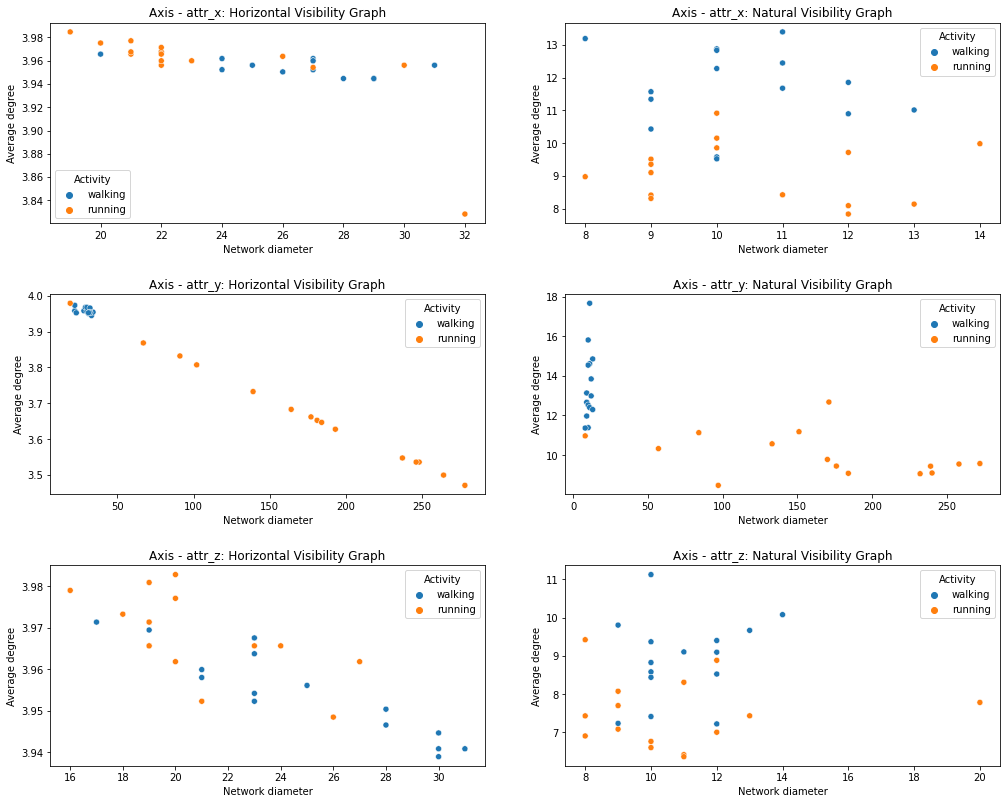

In [8]:
# Task 1.3 - average degree vs network diameter for walking and running
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plots
import seaborn as sns

figure, plots_matrix = plots.subplots(3, 2, figsize = (15,12))
figure.tight_layout(pad=5)

a_axis= ['attr_x', 'attr_y', 'attr_z']
for axis in ['attr_x', 'attr_y', 'attr_z']:
    for plot_itr in ['Horizontal Visibility Graph', 'Natural Visibility Graph']:
     new_table = output_table[ (output_table['Accelerometer axis'] == axis) & (output_table['Method'] == plot_itr) & (output_table['Activity'].isin(['walking','running']))]
     title = 'Axis - ' + str(axis)+ ': ' + plot_itr
     if plot_itr == 'Horizontal Visibility Graph':
       sns.scatterplot(data = new_table, x = 'Network diameter', y = 'Average degree', ax = plots_matrix[a_axis.index(axis), 0], hue = new_table['Activity']).set(title = title)
     else:
        sns.scatterplot(data = new_table, x = 'Network diameter', y = 'Average degree', ax = plots_matrix[a_axis.index(axis), 1], hue = new_table['Activity']).set(title = title)

plots.show()

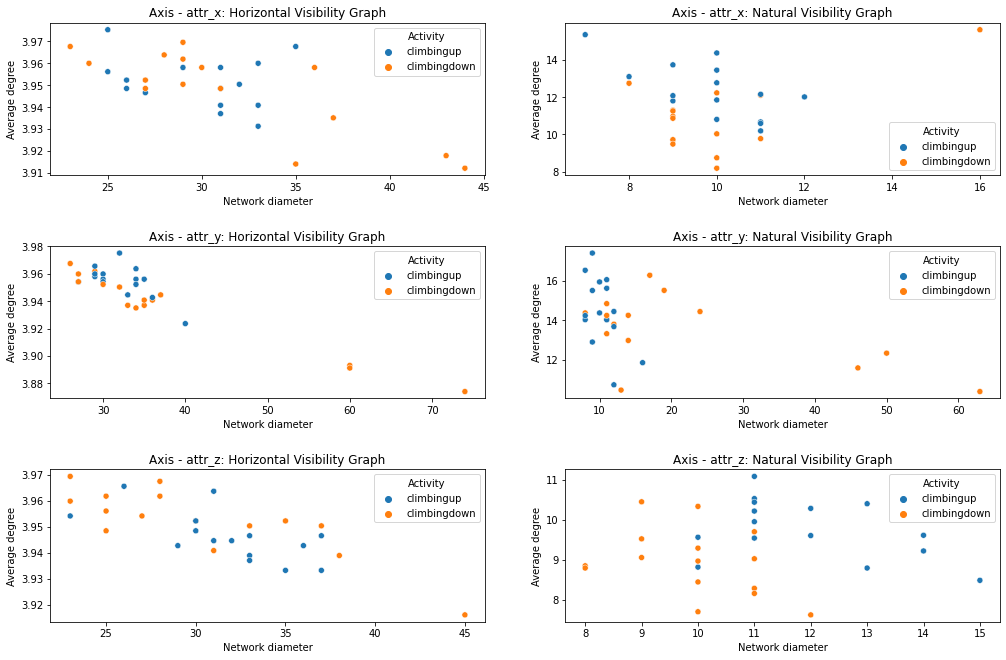

In [9]:
# Task 1.4 - average degree vs network diameter for climbingup and climbing down
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plots
import seaborn as sns

figure, plots_matrix = plots.subplots(3, 2, figsize = (15,10))
figure.tight_layout(pad=5)

a_axis= ['attr_x', 'attr_y', 'attr_z']
for axis in ['attr_x', 'attr_y', 'attr_z']:
    for plot_itr in ['Horizontal Visibility Graph', 'Natural Visibility Graph']:
     new_table = output_table[(output_table['Accelerometer axis'] == axis) & (output_table['Method'] == plot_itr) & (output_table['Activity'].isin(['climbingup','climbingdown']))]
     title = 'Axis - ' + str(axis)+ ': ' + plot_itr
     if plot_itr == 'Horizontal Visibility Graph':
       sns.scatterplot(data = new_table, x = 'Network diameter', y = 'Average degree', ax = plots_matrix[a_axis.index(axis), 0], hue = new_table['Activity']).set(title = title)
     else:
        sns.scatterplot(data = new_table, x = 'Network diameter', y = 'Average degree', ax = plots_matrix[a_axis.index(axis), 1], hue = new_table['Activity']).set(title = title)

plots.show()

In [11]:
#Task 2- (2.1, 2,2)
col_names = [ 'Subject', 'Accelerometer axis', 'Signal length', 'Dimension' , 'Delay' ,'Permutation entropy' , 'Complexity',  'Activity']
task2_table = pd.DataFrame(columns = col_names)

activity = ['walking', 'running', 'climbingup', 'climbingdown']

for subject_itr in range(1, 16):
  for activity_itr in activity:
    file_read = 'acc_' + activity_itr + '_chest_S' + str(subject_itr) + '.csv'
    file_data = pd.read_csv(file_read)
    for Signallength in [1024, 2048, 4096]:
      for Dimension in [3, 4, 5, 6]:
        for Delay in [1, 2, 3]:
          for attribute in ['attr_x', 'attr_y', 'attr_z']:
              op_result = ordinal_patterns(file_data[attribute][0:Signallength], Dimension, Delay)
              Permutation_Entropy = p_entropy(op_result)
              Complexity= complexity(op_result)
              temp_tb2 = {'Subject':subject_itr, 'Accelerometer axis':attribute, 'Signal length': Signallength , 
                          'Dimension': Dimension, 'Delay': Delay , 'Permutation entropy':Permutation_Entropy, 'Complexity': Complexity , 
                          'Activity':activity_itr}
              task2_table = task2_table.append(temp_tb2, ignore_index = True)
task2_table

,Subject,Accelerometer axis,Signal length,Dimension,Delay,Permutation entropy,Complexity,Activity
0,1,attr_x,1024,3,1,0.855987,0.119191,walking
1,1,attr_y,1024,3,1,0.816343,0.145361,walking
2,1,attr_z,1024,3,1,0.913619,0.075973,walking
3,1,attr_x,1024,3,2,0.960568,0.036283,walking
4,1,attr_y,1024,3,2,0.925266,0.064556,walking
...,...,...,...,...,...,...,...,...
6475,15,attr_y,4096,6,2,0.893186,0.197215,climbingdown
6476,15,attr_z,4096,6,2,0.935939,0.135029,climbingdown
6477,15,attr_x,4096,6,3,0.936129,0.135052,climbingdown
6478,15,attr_y,4096,6,3,0.947647,0.113763,climbingdown


In [12]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns


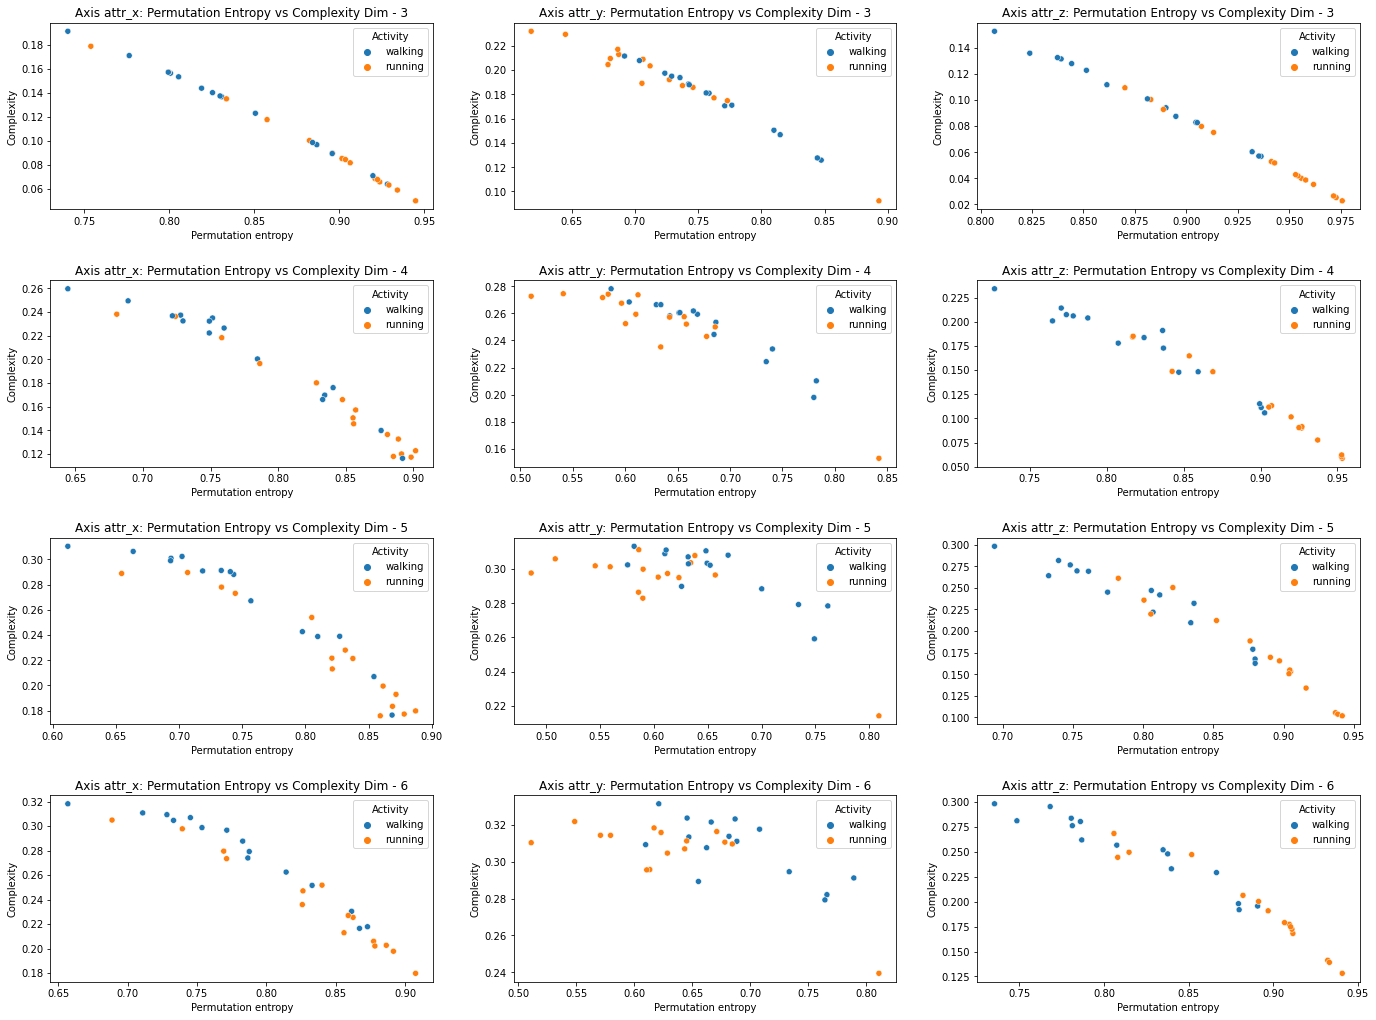

In [13]:
# Task 2.3- permutation entropy vs complexity for walking and running
fig, ax = plt.subplots(4, 3 ,  figsize=(20, 15))
fig.tight_layout(pad=5)

Dimension = [3,4,5,6]
for Dim in range(4):
  for axis in ['attr_x', 'attr_y', 'attr_z']:
    title= 'Axis ' + str(axis)+ ': ' + 'Permutation Entropy vs Complexity'+ ' Dim - ' + str(Dimension[Dim])
    task2_output= task2_table[(task2_table['Accelerometer axis'] == axis) & ((task2_table['Activity']=='walking') | (task2_table['Activity']=='running')) & (task2_table['Signal length'] == 4096) & (task2_table['Delay'] == 1) & (task2_table['Dimension'] == Dimension[Dim])]   
    if axis == 'attr_x':
      sns.scatterplot(data= task2_output, x='Permutation entropy', y='Complexity', hue="Activity" , ax=ax[Dimension.index(Dimension[Dim]),0]).set_title(title)
    elif axis == 'attr_y':
      sns.scatterplot(data= task2_output, x='Permutation entropy', y='Complexity', hue='Activity', ax=ax[Dimension.index(Dimension[Dim]),1]).set_title(title)
    elif axis == 'attr_z':
      sns.scatterplot(data= task2_output, x='Permutation entropy', y='Complexity', hue='Activity', ax=ax[Dimension.index(Dimension[Dim]),2]).set_title(title)
        

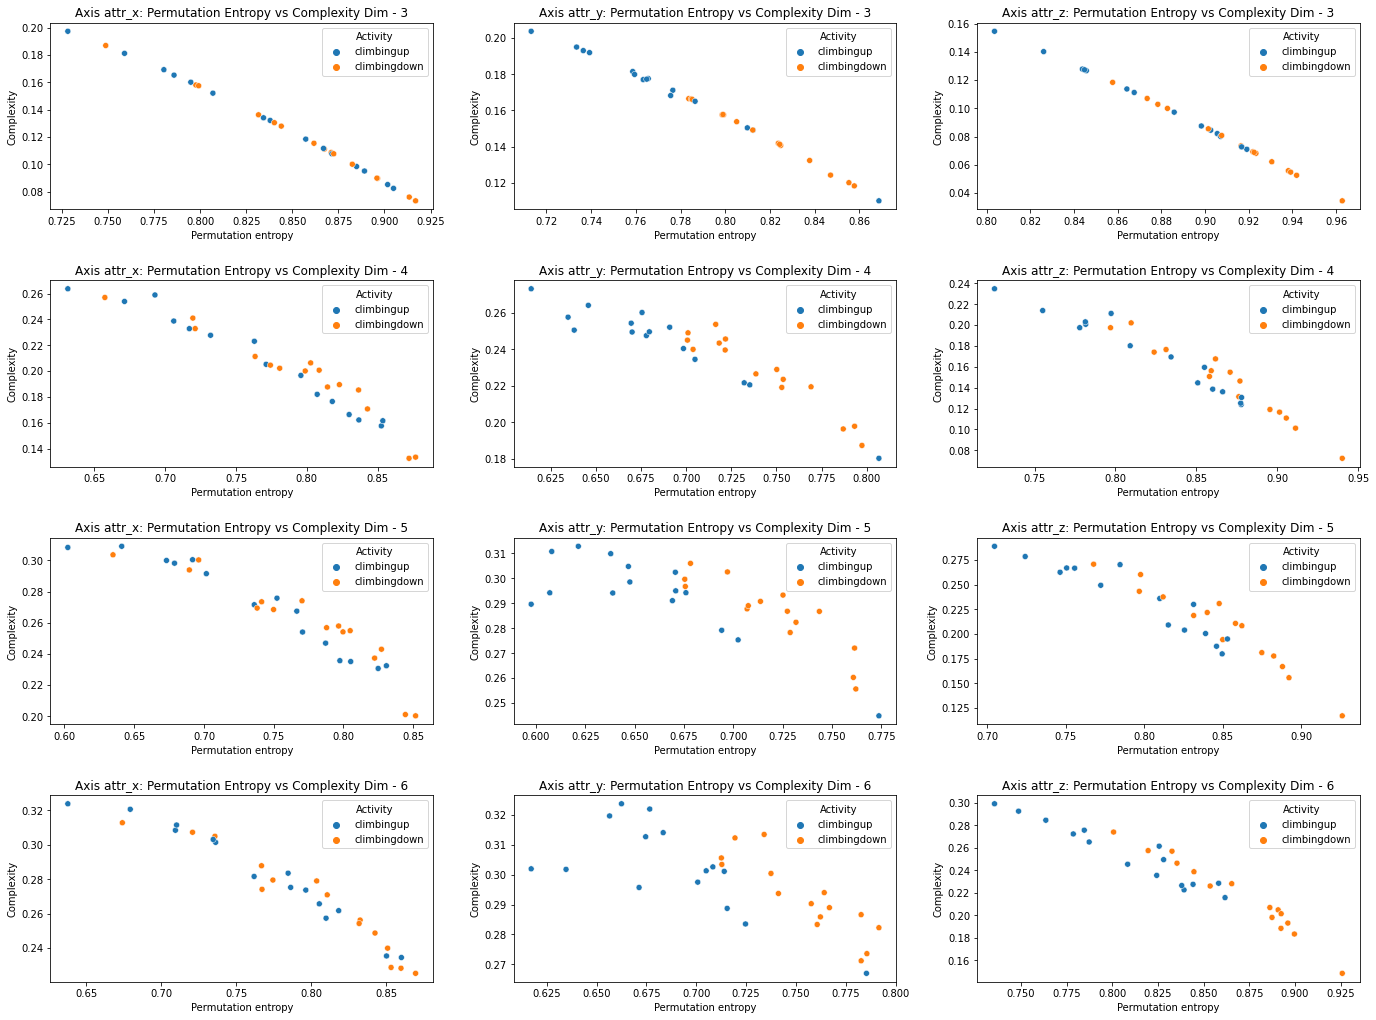

In [14]:
# Task 2.4- permutation entropy vs complexity for climbingup and climbingdown
fig, ax = plt.subplots(4, 3 ,  figsize=(20, 15))
fig.tight_layout(pad=5)

Dimension = [3,4,5,6]
for Dim in range(4):
  for axis in ['attr_x', 'attr_y', 'attr_z']:
    title= 'Axis ' + str(axis)+ ': ' + 'Permutation Entropy vs Complexity'+ ' Dim - ' + str(Dimension[Dim])
    task2_output= task2_table[(task2_table['Accelerometer axis'] == axis) & ((task2_table['Activity']=='climbingup') | (task2_table['Activity']=='climbingdown')) & (task2_table['Signal length'] == 4096) & (task2_table['Delay'] == 1) & (task2_table['Dimension'] == Dimension[Dim])]   
    if axis == 'attr_x':
      sns.scatterplot(data= task2_output, x='Permutation entropy', y='Complexity', hue="Activity" , ax=ax[Dimension.index(Dimension[Dim]),0]).set_title(title)
    elif axis == 'attr_y':
      sns.scatterplot(data= task2_output, x='Permutation entropy', y='Complexity', hue='Activity', ax=ax[Dimension.index(Dimension[Dim]),1]).set_title(title)
    elif axis == 'attr_z':
      sns.scatterplot(data= task2_output, x='Permutation entropy', y='Complexity', hue='Activity', ax=ax[Dimension.index(Dimension[Dim]),2]).set_title(title)
        